In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_carox_lsa.csv")

In [3]:
df_mlp

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CaryophylleneOxide
0,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
1,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,5,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.0
4,7,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
59996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
59997,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
59998,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_mlp.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

In [5]:
X = df_mlp.drop(['index', 'X..CaryophylleneOxide'], axis = 1)
y = df_mlp[['X..CaryophylleneOxide']]

<AxesSubplot:ylabel='Count'>

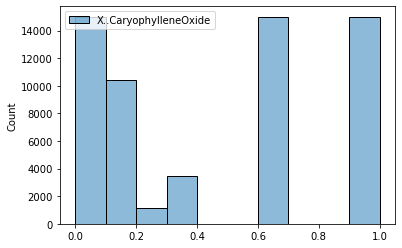

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.12984825364408958

In [11]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.803306520557364

In [12]:
#val
r2_score(y_val, y_pred_mlp)

0.7288472092597029

Residual plots for each target variable

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([8.69232374e-02, 9.37661898e-02, 1.03427252e-01, 1.41530330e-01,
       1.17224812e-01, 2.28141948e-01, 3.87557135e-04, 1.94362419e-04,
       9.04768679e-05, 1.83050784e-03, 3.63355341e-03, 0.00000000e+00,
       8.99348587e-03, 1.76016815e-04, 2.64678550e-03, 8.08660664e-03,
       6.61359730e-03, 7.20568960e-03, 0.00000000e+00, 2.83683157e-02,
       0.00000000e+00, 0.00000000e+00, 6.86907111e-03, 5.68087925e-03,
       7.80848275e-03, 2.39672747e-03, 6.31676191e-03, 1.08093527e-04,
       0.00000000e+00, 1.43624718e-03, 1.08258168e-02, 0.00000000e+00,
       7.65120401e-03, 0.00000000e+00, 1.03522784e-05, 6.84536283e-03,
       4.17864884e-03, 7.43185640e-03, 1.81163547e-04, 1.72276448e-04,
       2.12839325e-06, 1.80500005e-03, 5.09085471e-06, 1.97399524e-03,
       2.12635831e-04, 2.33510215e-03, 1.00384301e-03, 4.48709109e-04,
       4.05185490e-03, 2.81991723e-04, 8.46213148e-03, 7.27421480e-03,
       2.16050007e-03, 2.96725497e-04, 1.33927133e-03, 2.09328130e-04,
      

In [16]:
selector.threshold_

0.011627906976744186

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_mlp[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,euphoric
0,0.243491,0.034313,0.080290,-0.165609,0.019773,1,1
1,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0
2,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0
3,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,1
4,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,1
...,...,...,...,...,...,...,...
59995,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,0
59996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1
59997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0
59998,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1


In [21]:
selected_X.columns.to_list()

['lsa_0', 'lsa_1', 'lsa_2', 'lsa_3', 'lsa_4', 'hybrid', 'euphoric']

In [22]:
import joblib

joblib.dump(selector, "selector_mlp_lsa_elbow_carox.pkl")
joblib.dump(selected_X, "selected_X_mlp_lsa_elbow_carox.pkl")

['selected_X_mlp_lsa_elbow_carox.pkl']

In [23]:
# import joblib

# selected_X = joblib.load("selected_X_mlp_lsa_elbow_carox.pkl")

Train test split (after Feature Selection)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [25]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [26]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.2410575178790979

In [28]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.4286530950014713

In [29]:
#val
r2_score(y_val, y_pred_mlpreg)

0.4118986702927093

Hyperparameter Tuning

In [30]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [31]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [32]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [33]:
rscv.best_params_

{'max_iter': 500, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [34]:
joblib.dump(rscv, "rscv_mlp_lsa_elbow_carox.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_lsa_elbow_best_params_carox.pkl")

['rscv_mlp_lsa_elbow_best_params_carox.pkl']

MLP fit (after hyperparameter tuning)

In [35]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=500, activation = 'relu', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.1615235871798335

In [37]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.6991477962195072

In [38]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.6561918150742515

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [39]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [40]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_lsa_elbow_carox.pkl")
joblib.dump(y_test, "y_test_mlpreg_lsa_elbow_carox.pkl")

['y_test_mlpreg_lsa_elbow_carox.pkl']

In [41]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.15898809792548416

In [42]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.05089827750773918

In [43]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.2256064660149154

In [44]:
r2_score(y_test, y_pred_mlpreg_test)

0.6681447550285717

Error analysis

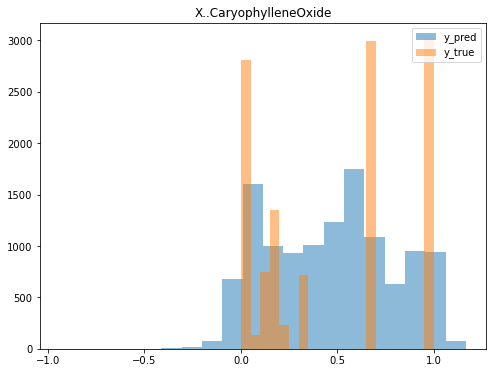

<Figure size 432x288 with 0 Axes>

In [45]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CaryophylleneOxide"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_lsa_elbow_carox.png')

Pearson R

In [46]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.817
P-value: 0.000


<AxesSubplot:>

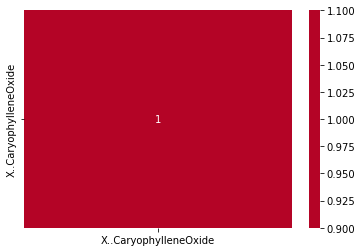

In [47]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)